<a href="https://colab.research.google.com/github/seymadogru/BasicDataTypes/blob/master/resnet50_17006_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [ ]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM_last"
outputBasePath = "/content/drive/MyDrive/imagearray"

In [ ]:
image_width = 224
image_height = 224

In [ ]:
classes = ['Benign','Malignant','Normal']

In [ ]:
os.chdir(inputBasePath)

In [ ]:
X = []
Y = []

In [ ]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [ ]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  2006
Y :  2006


In [ ]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (2006, 224, 224, 3)
Y :  (2006,)
X :  2006
Y :  2006


In [ ]:
os.chdir('..')

In [ ]:
os.chdir("imagearray")

In [ ]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [ ]:
data = np.load('/content/drive/MyDrive/imagearray/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearray/224x224_labels.npy')
data.shape

(2006, 224, 224, 3)

In [ ]:
labels

array(['Benign', 'Benign', 'Benign', ..., 'Normal', 'Normal', 'Normal'],
      dtype='<U9')

In [ ]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
data =  data.reshape(-1,image_width , image_height , 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .10, shuffle = True)

In [ ]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (1805, 224, 224, 3)
x_test shape: (201, 224, 224, 3)
y_train shape: (1805, 3)
y_test shape: (201, 3)




In [ ]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

In [ ]:
print(y_train.shape)
print(y_validate.shape)

(1624, 3)
(181, 3)


In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/CDD-CESM_last",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/CDD-CESM_last",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/CDD-CESM_last", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 5000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break

Found 2006 images belonging to 3 classes.
Found 587 images belonging to 1 classes.
Found 662 images belonging to 1 classes.
Found 757 images belonging to 1 classes.


In [ ]:


# Load the augmented images for the malignant class
augmented_images = os.listdir("/content/drive/MyDrive/CDD-CESM_last/Malignant")

# Count the number of augmented images
num_malignant_images = len(augmented_images)

# Print the number of malignant images
print("Number of malignant images:", num_malignant_images)


Number of malignant images: 5662


In [ ]:
# Load the augmented images for the malignant class
augmented_images2 = os.listdir("/content/drive/MyDrive/CDD-CESM_last/Normal")

# Count the number of augmented images
num_normal_images = len(augmented_images2)

# Print the number of malignant images
print("Number of normal images:", num_normal_images)

Number of normal images: 5757


In [ ]:
augmented_images3 = os.listdir("/content/drive/MyDrive/CDD-CESM_last/Benign")

# Count the number of augmented images
num_benign_images = len(augmented_images3)

# Print the number of malignant images
print("Number of benign images:", num_benign_images)

Number of benign images: 5587


## Toplam görüntü sayısı; 17006

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [3]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [4]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM_last"
outputBasePath = "/content/drive/MyDrive/imagearraynew"

In [5]:
image_width = 224
image_height = 224

In [6]:
classes = ['Benign','Malignant','Normal']

In [7]:
os.chdir(inputBasePath)

In [8]:
X = []
Y = []

In [9]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [10]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  17006
Y :  17006


In [11]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (17006, 224, 224, 3)
Y :  (17006,)
X :  17006
Y :  17006


In [12]:
os.chdir('..')

In [13]:
os.chdir("imagearraynew")

In [14]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [16]:
data = np.load('/content/drive/MyDrive/imagearraynew/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearraynew/224x224_labels.npy')
data.shape

(17006, 224, 224, 3)

In [17]:
labels

array(['Benign', 'Benign', 'Benign', ..., 'Normal', 'Normal', 'Normal'],
      dtype='<U9')

In [18]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [19]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [20]:
data =  data.reshape(-1,image_width , image_height , 3)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .10, shuffle = True)

In [22]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (15305, 224, 224, 3)
x_test shape: (1701, 224, 224, 3)
y_train shape: (15305, 3)
y_test shape: (1701, 3)




In [24]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [23]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

In [24]:
print(y_train.shape)
print(y_validate.shape)

(13774, 3)
(1531, 3)


In [27]:
!pip install keras
import keras

In [28]:

base_model = keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

102967424/102967424 [==============================] - 4s 0us/step


In [29]:
num_classes=3
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

In [30]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [32]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [33]:
epc = 20
bs = 16

In [37]:
history = model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/20
861/861 [==============================] - 18s 21ms/step - loss: 1.0814 - accuracy: 0.4256 - val_loss: 1.0807 - val_accuracy: 0.4487 - lr: 1.0000e-05
Epoch 2/20
861/861 [==============================] - 17s 20ms/step - loss: 1.0816 - accuracy: 0.4225 - val_loss: 1.0806 - val_accuracy: 0.4481 - lr: 1.0000e-05
Epoch 3/20
861/861 [==============================] - 17s 20ms/step - loss: 1.0812 - accuracy: 0.4322 - val_loss: 1.0805 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 4/20
861/861 [==============================] - 17s 20ms/step - loss: 1.0805 - accuracy: 0.4299 - val_loss: 1.0805 - val_accuracy: 0.4494 - lr: 1.0000e-05
Epoch 5/20
861/861 [==============================] - 17s 20ms/step - loss: 1.0816 - accuracy: 0.4245 - val_loss: 1.0804 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 6/20
861/861 [==============================] - 17s 20ms/step - loss: 1.0800 - accuracy: 0.4317 - val_loss: 1.0803 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 7/20
861/861 [==============

80 epoch çalıştırıldı

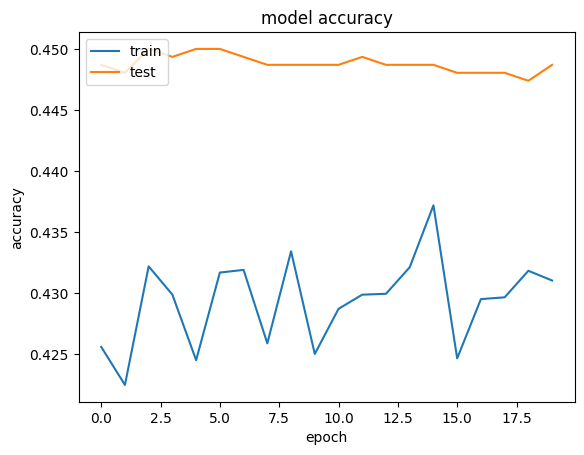

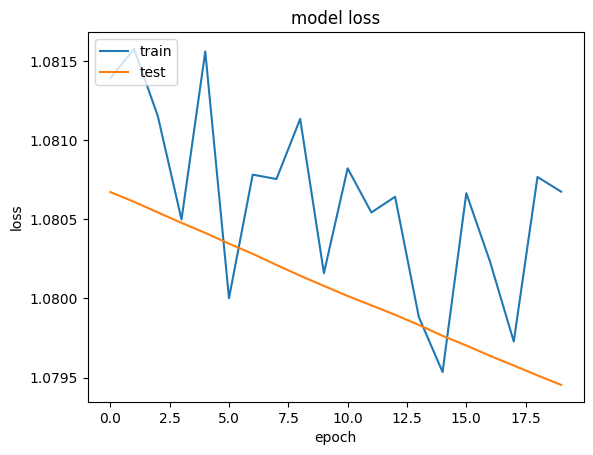

In [38]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

54/54 [==============================] - 4s 35ms/step


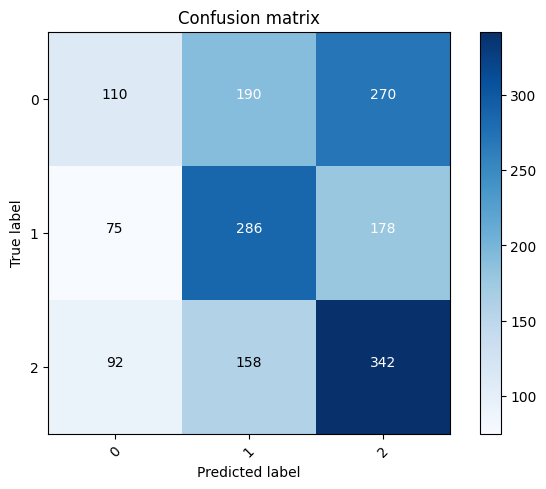

In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [40]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.19      0.26       570
           1       0.45      0.53      0.49       539
           2       0.43      0.58      0.49       592

    accuracy                           0.43      1701
   macro avg       0.43      0.43      0.41      1701
weighted avg       0.43      0.43      0.41      1701

